In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
platypus_tr = []
for file_path in glob.glob('archive (5)/Scarlett Johansson/*'):
    image = cv2.imread(file_path)
    platypus_tr.append(image)

perry_tr = []
for file_path in glob.glob('archive (5)/Robert Downey Jr/*'):
    image = cv2.imread(file_path)
    perry_tr.append(image)


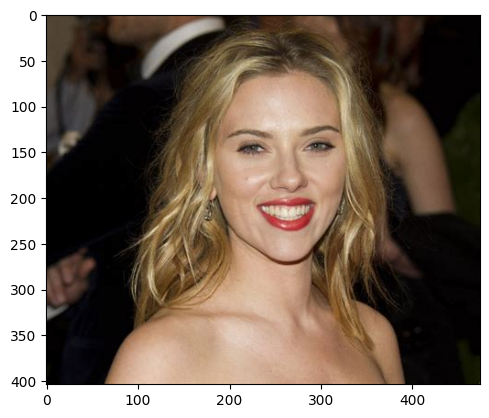

In [4]:
plt.imshow(cv2.cvtColor(platypus_tr[9],cv2.COLOR_BGR2RGB))

In [5]:
perry_labeled = [(image, 'perry') for image in perry_tr]
platypus_labeled = [(image, 'platypus') for image in platypus_tr]

In [6]:
combined_data = perry_labeled + platypus_labeled

In [7]:
combined_data

[(array([[[143, 134, 121],
          [142, 133, 120],
          [140, 131, 118],
          ...,
          [100,  95,  92],
          [ 99,  94,  91],
          [ 99,  94,  91]],
  
         [[142, 133, 120],
          [141, 132, 119],
          [139, 130, 117],
          ...,
          [ 98,  93,  90],
          [ 97,  92,  89],
          [ 97,  92,  89]],
  
         [[141, 132, 119],
          [140, 131, 118],
          [138, 129, 116],
          ...,
          [ 95,  90,  87],
          [ 94,  91,  87],
          [ 94,  91,  87]],
  
         ...,
  
         [[ 24,  19,  20],
          [ 22,  17,  18],
          [ 20,  15,  16],
          ...,
          [ 29,  24,  25],
          [ 30,  25,  26],
          [ 30,  25,  26]],
  
         [[ 66,  61,  62],
          [ 22,  17,  18],
          [ 19,  14,  15],
          ...,
          [ 33,  28,  29],
          [ 30,  25,  26],
          [ 70,  65,  66]],
  
         [[ 66,  61,  62],
          [ 22,  17,  18],
          [ 19,  14,  15

In [8]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

RESIZE_WIDTH = 100 
RESIZE_HEIGHT = 100 

resized_images = []
labels = []

for image, label in combined_data:
    resized_image = cv2.resize(image, (RESIZE_WIDTH, RESIZE_HEIGHT))
    normalized_image = resized_image.astype(np.float32) / 255.0
    resized_images.append(normalized_image)
    labels.append(label)

X = np.array(resized_images)
y = np.array(labels)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
y_train

array(['platypus', 'perry', 'perry', 'platypus', 'platypus', 'perry',
       'perry', 'platypus', 'perry', 'platypus', 'platypus', 'platypus',
       'platypus', 'platypus', 'platypus', 'platypus', 'perry', 'perry',
       'perry', 'platypus', 'platypus', 'platypus', 'perry', 'platypus',
       'perry', 'platypus', 'platypus', 'perry', 'perry', 'perry',
       'platypus', 'platypus', 'perry', 'platypus', 'perry', 'perry',
       'platypus', 'platypus', 'platypus', 'perry', 'platypus', 'perry',
       'perry', 'platypus', 'platypus', 'platypus', 'platypus', 'perry',
       'platypus', 'perry', 'platypus', 'platypus', 'perry', 'platypus',
       'platypus', 'platypus', 'platypus', 'platypus', 'platypus',
       'platypus', 'perry', 'platypus', 'platypus', 'platypus',
       'platypus', 'platypus', 'perry', 'platypus', 'platypus',
       'platypus', 'platypus', 'platypus', 'platypus', 'platypus',
       'platypus', 'platypus', 'platypus', 'platypus', 'platypus',
       'perry', 'platypus'

In [10]:
for i in range(len(y_train)):
    if y_train[i]=='perry':
        y_train[i]=1
    else:
        y_train[i]=0
for i in range(len(y_val)):
    if y_val[i]=='perry':
        y_val[i]=1
    else:
        y_val[i]=0

In [11]:
y_val

array(['0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '1'], dtype='<U8')

In [12]:
import numpy as np


y_train = y_train.astype(np.float32)
y_val=y_val.astype(np.float32)


In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (10,10), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (4,4), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.009)

# Compile the model with the specified optimizer
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

model.save('my_cnn_model.h5')




Epoch 1/50


6/6 [==============================] - 6s 458ms/step - loss: 38.3916 - accuracy: 0.5885 - val_loss: 0.6380 - val_accuracy: 0.6458
Epoch 2/50
6/6 [==============================] - 2s 276ms/step - loss: 0.8777 - accuracy: 0.5781 - val_loss: 0.6225 - val_accuracy: 0.6458
Epoch 3/50
6/6 [==============================] - 2s 280ms/step - loss: 0.8190 - accuracy: 0.3438 - val_loss: 0.7288 - val_accuracy: 0.3958
Epoch 4/50
6/6 [==============================] - 2s 272ms/step - loss: 0.6533 - accuracy: 0.5677 - val_loss: 0.7774 - val_accuracy: 0.6458
Epoch 5/50
6/6 [==============================] - 2s 272ms/step - loss: 0.6571 - accuracy: 0.6875 - val_loss: 0.5976 - val_accuracy: 0.6458
Epoch 6/50
6/6 [==============================] - 2s 261ms/step - loss: 0.5410 - accuracy: 0.7240 - val_loss: 0.5679 - val_accuracy: 0.7917
Epoch 7/50
6/6 [==============================] - 2s 328ms/step - loss: 0.5460 - accuracy: 0.7500 - val_loss: 0.5977 - val_accuracy: 0.5833
Epoch 8/50
6/6 

c:\Users\sriyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
loss, accuracy = model.evaluate(X_val, y_val)

2/2 [==============================] - 0s 47ms/step - loss: 0.4581 - accuracy: 0.8167


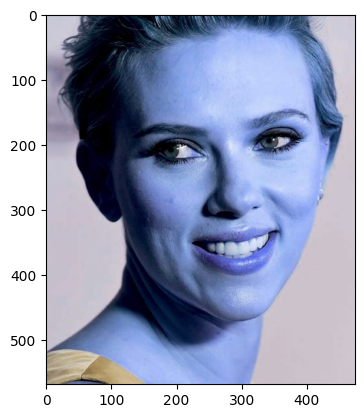

In [17]:
path='archive (5)/Scarlett Johansson/009_fc574624.jpg'
imag=cv2.imread(path)
plt.imshow(imag)

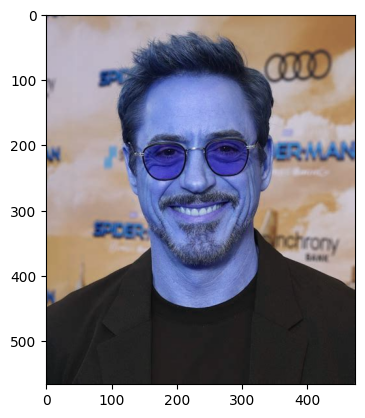

In [15]:
path='archive (5)/Robert Downey Jr/002_cc92e159.jpg'
imag=cv2.imread(path)
plt.imshow(imag)

In [18]:


imag = cv2.resize(resized_image, (100, 100)) 
imag = imag.astype(np.float32) / 255.0 
imag = np.expand_dims(imag, axis=0)

print(imag.shape)

model.predict(imag)
ans=model.predict(imag)
print(ans)
threshold = 0.5
predicted_label = 1 if ans >= threshold else 0
if predicted_label==1:
    print("perry")
else:
    print('platypus')


(1, 100, 100, 3)
1/1 [==============================] - 0s 55ms/step
[[0.3381802]]
platypus


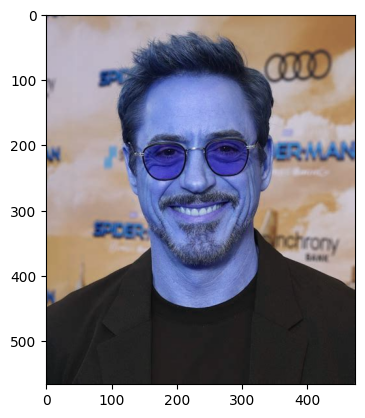